<a href="https://colab.research.google.com/github/budhiacharya/AI-Lesson/blob/main/Assign_9_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 9: Unsupervised Learning

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [7]:
# Load the Wholesale customer dataset from Kaggle
import kagglehub
import pandas as pd
import os

# Download the dataset from Kaggle
path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")

print("Dataset downloaded to:", path)

# Find the CSV file inside the downloaded folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

# Load the dataset
df = pd.read_csv(csv_path)


Using Colab cache for faster access to the 'wholesale-customers-data-set' dataset.
Dataset downloaded to: /kaggle/input/wholesale-customers-data-set


In [10]:
# Basic information
print("Shape:", df.shape)
print(df.head(5))

Shape: (440, 8)
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [11]:
# Define feature matrix
X = df.drop(columns=["Channel", "Region"], errors="ignore")  # drop categorical for now

In [13]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(X_imputed.head())

     Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669.0  9656.0   7561.0   214.0            2674.0      1338.0
1   7057.0  9810.0   9568.0  1762.0            3293.0      1776.0
2   6353.0  8808.0   7684.0  2405.0            3516.0      7844.0
3  13265.0  1196.0   4221.0  6404.0             507.0      1788.0
4  22615.0  5410.0   7198.0  3915.0            1777.0      5185.0


In [14]:
# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

In [15]:
# Determine the optimal number of clusters using Elbow Method and Silhouette Score
inertia_list = []
silhouette_list = []

for k in range(2, 7):  # you can increase range(2,11) for deeper search
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)  # lower inertia = tighter clusters
    silhouette_list.append(silhouette_score(X_scaled, km.labels_))  # higher = better separation

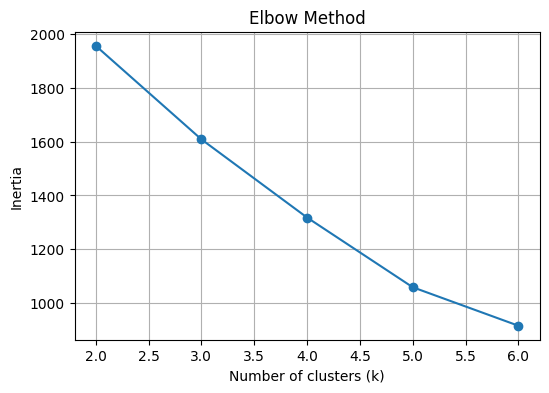

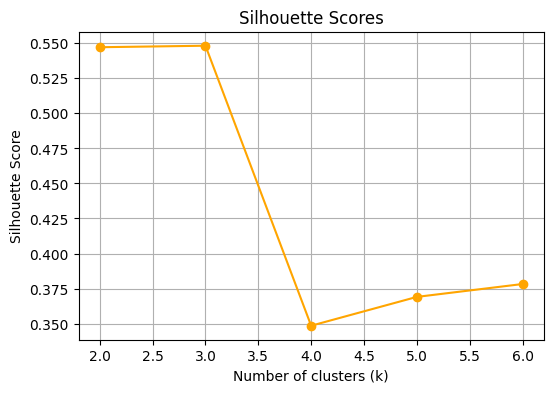

In [17]:
# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(range(2,7), inertia_list, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(range(2,7), silhouette_list, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [18]:
# Print results
for i, k in enumerate(range(2,7)):
    print(f"k={k}: Inertia={inertia_list[i]:.2f}, Silhouette={silhouette_list[i]:.3f}")

k=2: Inertia=1956.12, Silhouette=0.547
k=3: Inertia=1608.43, Silhouette=0.548
k=4: Inertia=1317.84, Silhouette=0.348
k=5: Inertia=1058.77, Silhouette=0.369
k=6: Inertia=915.74, Silhouette=0.378


In [19]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
#run KMeans 10 times, each time randomly initializing centroids.
#Best result wins : the clustering with the lowest sum of squared distances (inertia).
labels_kmeans = kmeans.fit_predict(X_scaled)

In [20]:
# Apply Agglomerative Clustering with 3 clusters
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_scaled)

In [21]:
# Calculate and print Silhouette Scores for both clustering methods
sil_score_kmeans = silhouette_score(X_scaled, labels_kmeans)
sil_score_agg = silhouette_score(X_scaled, labels_agg)
print("KMeans Silhouette Score:", sil_score_kmeans)
print("Hierarchical Silhouette Score:", sil_score_agg)

KMeans Silhouette Score: 0.5482872649700601
Hierarchical Silhouette Score: 0.2646091480214908


In [22]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['KMeans_Cluster'] = labels_kmeans
df_pca['Hierarchical_Cluster'] = labels_agg

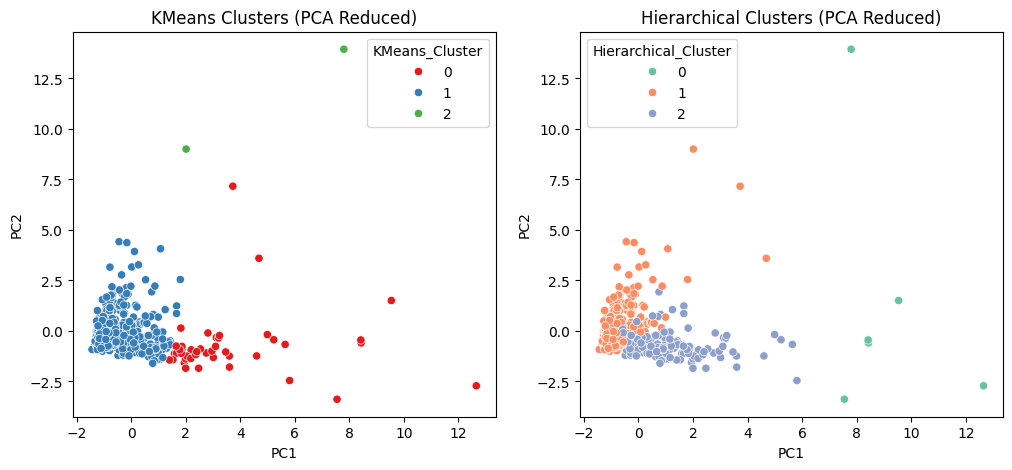

In [23]:
# Visualize the clusters in 2D PCA space
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=df_pca, palette='Set1')
plt.title("KMeans Clusters (PCA Reduced)")
plt.subplot(1,2,2)
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=df_pca, palette='Set2')
plt.title("Hierarchical Clusters (PCA Reduced)")
plt.show()

In [1]:
# Deployment and Monitoring
deployment_notes = """
Deployment Plan (Hypothetical):
The clustering model segments wholesale customers based on spending patterns (e.g., Fresh, Grocery, Milk).
In a real-world scenario, this model could be deployed by a wholesale distributor or retail analytics system to:

- Identify customer groups for personalized marketing or discount strategies.
- Recommend product bundles tailored to each cluster.
- Support inventory planning by forecasting demand from specific customer segments.

Potential Challenges:
- Latency: Real-time prediction may slow if preprocessing (scaling, PCA) runs on large batches.
- Scalability: As new customer data grows, model predictions must scale to thousands of entries daily.
- Maintenance: Spending patterns may shift seasonally, causing cluster definitions to drift over time.

Monitoring Strategies:
- Performance Tracking: Periodically compute Silhouette scores and compare to baseline values.
- Data Drift Detection: Use statistical checks (e.g., mean or variance shifts) to detect feature distribution changes.
- Automation: Schedule monthly or quarterly retraining to refresh cluster boundaries and PCA components.

Updating Strategy
- Refit the PCA transformation and K-Means model using the latest full dataset.
- Save as a new version (e.g., model_v2.joblib).
- Test updated clusters on a subset (A/B test) before full rollout.
- Archive old versions for rollback and comparison.
"""
print(deployment_notes)


Deployment Plan (Hypothetical):
The clustering model segments wholesale customers based on spending patterns (e.g., Fresh, Grocery, Milk).
In a real-world scenario, this model could be deployed by a wholesale distributor or retail analytics system to:

- Identify customer groups for personalized marketing or discount strategies.
- Recommend product bundles tailored to each cluster.
- Support inventory planning by forecasting demand from specific customer segments.

Potential Challenges:
- Latency: Real-time prediction may slow if preprocessing (scaling, PCA) runs on large batches.
- Scalability: As new customer data grows, model predictions must scale to thousands of entries daily.
- Maintenance: Spending patterns may shift seasonally, causing cluster definitions to drift over time.

Monitoring Strategies:
- Performance Tracking: Periodically compute Silhouette scores and compare to baseline values.
- Data Drift Detection: Use statistical checks (e.g., mean or variance shifts) to dete